### **Import necessary libraries**

In [20]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report
import random

### **Load mnist dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Reshape input data to fit the Conv2D layer: (28, 28, 1) where 1 is the number of channels (grayscale)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

### **Build the convolutional neural network model**

In [5]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)), # First Conv Layer
    MaxPooling2D(pool_size=(2, 2)), # Max Pooling
    Conv2D(64, kernel_size=(3, 3), activation='relu'), # Second Conv Layer
    MaxPooling2D(pool_size=(2, 2)), # Max Pooling
    Flatten(), # Flattening the 2D matrix to 1D vector
    Dense(128, activation='relu'), # Fully Connected Layer
    Dense(10, activation='softmax') # Output Layer for 10 classes
])

### **Compile the model**

In [7]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

### **Train the model**

In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2) # 20% validation split from training set

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9020 - loss: 0.3196 - val_accuracy: 0.9737 - val_loss: 0.0892
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9842 - loss: 0.0513 - val_accuracy: 0.9837 - val_loss: 0.0526
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9902 - loss: 0.0309 - val_accuracy: 0.9886 - val_loss: 0.0369
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9936 - loss: 0.0202 - val_accuracy: 0.9885 - val_loss: 0.0419
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9948 - loss: 0.0152 - val_accuracy: 0.9887 - val_loss: 0.0407
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9965 - loss: 0.0110 - val_accuracy: 0.9903 - val_loss: 0.0402
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9975 - loss: 0.0082 - val_accuracy: 0.9899 - val_loss: 0.0419
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9965 - loss: 0

### **Evaluate the model on the test set**

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

313/313 - 1s - 3ms/step - accuracy: 0.9911 - loss: 0.0400
Test accuracy: 0.991100013256073
Test loss: 0.03995545580983162


### **Plot training & validation loss values**

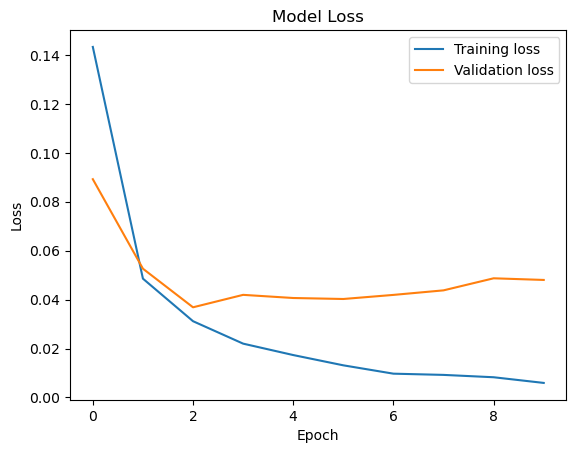

In [10]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


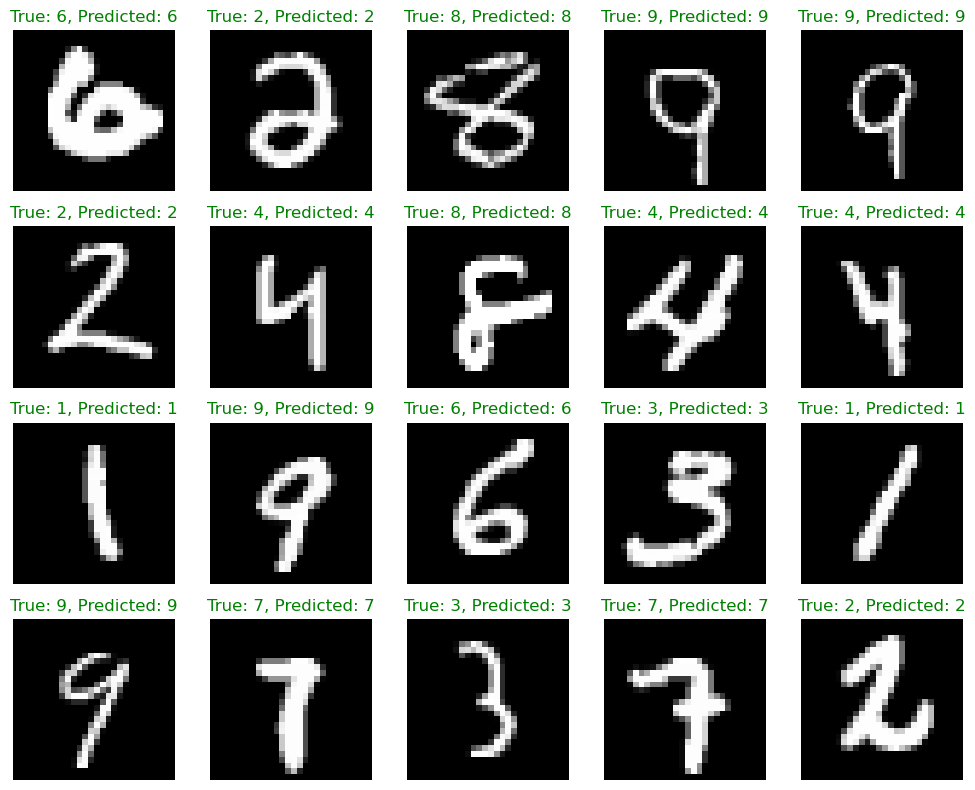

In [11]:
# Plot 20 random images with labels from the training set and color-code predictions
fig, axes = plt.subplots(4, 5, figsize=(10, 8)) # Create a grid of 4 rows and 5 columns

# Select 20 random indices from the training set
random_indices = random.sample(range(x_train.shape[0]), 20)

# Loop through the random images
for i, ax in enumerate(axes.flat):
    idx = random_indices[i]
    image = x_train[idx].reshape(28, 28) # Reshape the image to 28x28
    true_label = y_train[idx]

    # Predict the label
    prediction = np.argmax(model.predict(x_train[idx:idx+1]), axis=-1)[0]

    # Display the image
    ax.imshow(image, cmap='gray')

    # Set title and color it based on correctness
    if prediction == true_label:
        ax.set_title(f'True: {true_label}, Predicted: {prediction}', color='green')
    else:
        ax.set_title(f'True: {true_label}, Predicted: {prediction}', color='red')
    
    # Remove axis
    ax.axis('off')

plt.tight_layout()
plt.show()

### **Classification Report**

In [21]:
# Get the predicted labels from the model's output probabilities
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Convert multilabel-indicator labels to multiclass labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=-1)

print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### **Confusion Matrix**

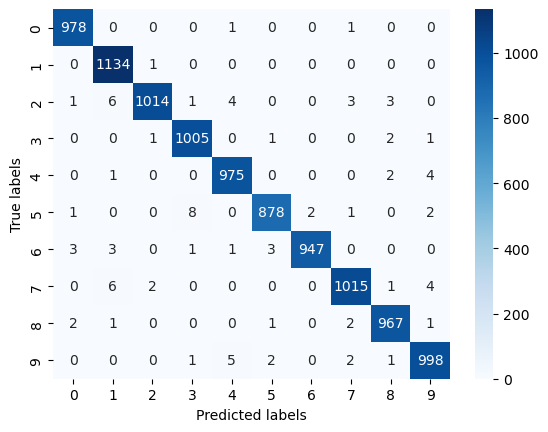

In [22]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Set the plot labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()